# Mínimos cuadrados
**Nota:** Los siguientes ejercicios están basados en las notas de clase disponibles en: https://github.com/ITAM-DS/Propedeutico/blob/master/Python/clases/3_algebra_lineal/3_minimos_cuadrados.ipynb

## Ejercicio 4:

Ajusta por mínimos cuadrados dos modelos de la forma:<br><br>
**Modelo 1:** $log(y)=log(b)+alog(x)$<br>
**Modelo 2:** $log(y)=log(b)+alog(x)+clog(x)^{2}$ 
<br><br>
Realizar una gráfica que involucre los datos y los tres modelos. Calcula el $ECM$ de ambos modelos y responde, ¿cuál es el modelo con menor $ECM$?


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import pprint
np.set_printoptions(precision = 4)

In [13]:
# ECM vectorizado
def cal_ecm(y_vec, yhat_vec): 
    ec = (y_vec-yhat_vec)
    ec_2 = np.power(ec, 2)
    ec_2_sum = np.sum(ec_2)
    ecm = np.mean(ec_2)
    return ec_2_sum, ecm

In [14]:
# importar datos
datos = np.loadtxt('datos_para_tarea_minimos_cuadrados.txt', skiprows=1)
y = datos[:, 1]
log_y = np.log(y)
x = datos[:, 0]
mpoints, = x.shape

## Modelo 1
Considere el modelo 1, expresado a continuación:
$$log(y)=log(b)+alog(x)$$
<br>
Note que estimar el anterior modelo, es equivalente a estimar la siguiente ecuación:
$$y = bx^{a}$$ 
<br>

In [15]:
# Modelo 1
log_var = lambda x: np.log(x)

A_m1 = np.ones((mpoints, 2))
A_m1[:, 1] = log_var(x)

Q_m1,R_m1 = np.linalg.qr(A_m1) 
beta_m1 = np.linalg.solve(R_m1, Q_m1.T@log_y) 
log_yhat_m1 = A_m1@beta_m1
yhat_m1 = np.exp(log_yhat_m1)
b_m1, a_m1 = beta_m1

ec_m1_log, ecm_m1_log = cal_ecm(log_y, log_yhat_m1)
ec_m1, ecm_m1 = cal_ecm(y, yhat_m1)

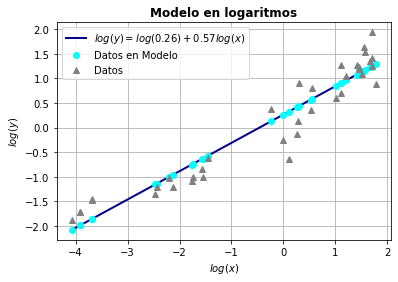

----------------------
Modelo 1 en logaritmos
----------------------
Forma logarítmica: log(yhat) = log(0.2646) + 0.5756log(x)
Error cuadrático = 4.3200
Error cuadrático medio = 0.1168
----------------------


In [17]:
# Gráfica del modelo en logaritmos
x_log = np.log(x)
x_eval_log_m1 = np.linspace(np.min(x_log), np.max(x_log), 1000)
y_eval_log_m1 = b_m1 + a_m1*x_eval_log_m1
# en logarítmos
plt.plot(x_eval_log_m1, y_eval_log_m1, '-',color='darkblue', linewidth=2.0)
plt.plot(x_log, log_yhat_m1,'o', color='aqua') # yhat(log(x))
plt.plot(x_log, log_y,'^', color='grey') # logy(log(x))
plt.legend(('$log(y)=log(0.26)+0.57log(x)$', 'Datos en Modelo', 'Datos'), loc='best')
plt.xlabel('$log(x)$'); plt.ylabel('$log(y)$')
plt.title('Modelo en logaritmos', fontweight='bold')
plt.grid(True)
plt.show()

# Resultados
mod_1 = str('Modelo 1 en logaritmos')
print('-'*len(mod_1)); print(mod_1); print('-'*len(mod_1))
print(f"Forma logarítmica: log(yhat) = log({'{0:.4f}'.format(b_m1)}) + {'{0:.4f}'.format(a_m1)}log(x)")
print(f"Error cuadrático = {'{0:.4f}'.format(ec_m1_log)}")
print(f"Error cuadrático medio = {'{0:.4f}'.format(ecm_m1_log)}")      
print('-'*len(mod_1));

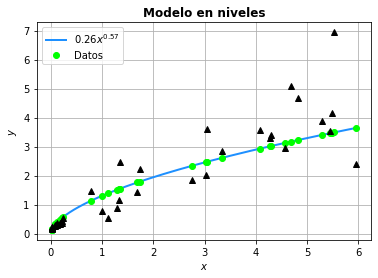

-------------------
Modelo 1 en Niveles
-------------------
Niveles: yhat = 0.2646x^0.5756
Error cuadrático = 25.3018
Error cuadrático medio = 0.6838
-------------------


In [18]:
# Modelo en Niveles
x_eval_m1 = np.exp(x_eval_log_m1)
y_eval_m1 = np.exp(y_eval_log_m1)
# en niveles
plt.plot(x_eval_m1, y_eval_m1, '-',color='dodgerblue', linewidth=2.0)
plt.plot(x, yhat_m1,'o', color='lime') # yhat(log(x))
plt.plot(x, y,'^', color='black') # logy(log(x))
plt.legend(("$0.26x^{0.57}$", 'Datos'), loc='best')
plt.xlabel('$x$'); plt.ylabel('$y$')
plt.title('Modelo en niveles', fontweight='bold')
plt.grid(True)
plt.show()

mod_1 = str('Modelo 1 en Niveles')
print('-'*len(mod_1)); print(mod_1); print('-'*len(mod_1))
print(f"Niveles: yhat = {'{0:.4f}'.format(b_m1)}x^{'{0:.4f}'.format(a_m1)}")
print(f"Error cuadrático = {'{0:.4f}'.format(ec_m1)}")
print(f"Error cuadrático medio = {'{0:.4f}'.format(ecm_m1)}") 
print('-'*len(mod_1));

## Modelo 2
Considere el modelo 1, expresado a continuación:
$$log(y)=log(b)+alog(x)+c(log(x))^{2}$$
<br>
Note que estimar el anterior modelo, es equivalente a estimar la siguiente ecuación:
$$y=bx^{a}e^{clog^{2}(x)}$$
<br>

In [19]:
# Modelo 2
log_cuad_var = lambda x: (np.log(x))**2

A_m2 = np.ones((mpoints, 3))
A_m2[:, 1] = log_var(x)
A_m2[:, 2] = log_cuad_var(x)

Q_m2,R_m2 = np.linalg.qr(A_m2) 
beta_m2 = np.linalg.solve(R_m2, Q_m2.T@log_y)

log_yhat_m2 = A_m2@beta_m2
yhat_m2 = np.exp(log_yhat_m2)
b_m2, a_m2, c_m2 = beta_m2

ec_m2_log, ecm_m2_log = cal_ecm(log_y, log_yhat_m2)
ec_m2, ecm_m2 = cal_ecm(y, yhat_m2)

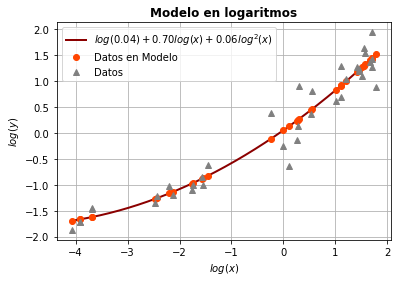

----------------------
Modelo 2 en logaritmos
----------------------
Forma logarítmica: $log(yhat) = log(0.0496) + 0.7006log(x) + 0.0670log^2(x)$
Error cuadrático = 2.9219
Error cuadrático medio = 0.0790
----------------------


In [20]:
# Gráfica del modelo en logaritmos
x_eval_log_m2 = np.linspace(np.min(x_log), np.max(x_log), 1000)
x_eval_log2_m2 = np.power(x_eval_log_m2,2)
y_eval_log_m2 = b_m2 + a_m2*x_eval_log_m2 + c_m2*x_eval_log2_m2 

# en logarítmos
plt.plot(x_eval_log_m2, y_eval_log_m2, '-',color='darkred', linewidth=2.0)
plt.plot(x_log, log_yhat_m2,'o', color='orangered') # yhat(log(x))
plt.plot(x_log, log_y,'^', color='grey') # logy(log(x))
plt.legend(('$log(0.04) + 0.70log(x) + 0.06log^{2}(x)$', 'Datos en Modelo', 'Datos'), loc='best')
plt.xlabel('$log(x)$'); plt.ylabel('$log(y)$')
plt.title('Modelo en logaritmos', fontweight='bold')
plt.grid(True)
plt.show()

# Resultados
mod_2 = str('Modelo 2 en logaritmos')
print('-'*len(mod_2)); print(mod_2); print('-'*len(mod_2))
print(f"Forma logarítmica: $log(yhat) = log({'{0:.4f}'.format(b_m2)}) + {'{0:.4f}'.format(a_m2)}log(x) + {'{0:.4f}'.format(c_m2)}log^{2}(x)$")
print(f"Error cuadrático = {'{0:.4f}'.format(ec_m2_log)}")
print(f"Error cuadrático medio = {'{0:.4f}'.format(ecm_m2_log)}")      
print('-'*len(mod_2));

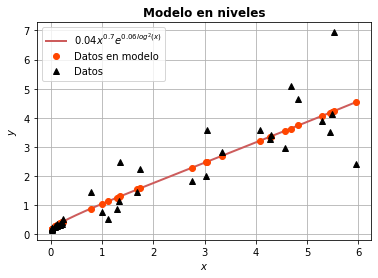

-------------------
Modelo 2 en niveles
-------------------
Niveles: yhat = 0.0496x^0.7006
Error cuadrático = 20.3041
Error cuadrático medio = 0.5488
-------------------


In [21]:
# en niveles
x_eval_m2 = np.exp(x_eval_log_m2)
y_eval_m2 = np.exp(y_eval_log_m2)

# en niveles
plt.plot(x_eval_m2, y_eval_m2, '-',color='indianred', linewidth=2.0)
plt.plot(x, yhat_m2, 'o',color='orangered', linewidth=2.0)
plt.plot(x, y,'^', color='black') # logy(log(x))

plt.legend(("$0.04x^{0.7}e^{0.06log^{2}(x)}$", 'Datos en modelo', 'Datos'), loc='best')
plt.xlabel('$x$'); plt.ylabel('$y$')
plt.title('Modelo en niveles', fontweight='bold')
plt.grid(True)
plt.show()

# resultados
mod_2 = str('Modelo 2 en niveles')
print('-'*len(mod_2)); print(mod_2); print('-'*len(mod_2))
print(f"Niveles: yhat = {'{0:.4f}'.format(b_m2)}x^{'{0:.4f}'.format(a_m2)}")
print(f"Error cuadrático = {'{0:.4f}'.format(ec_m2)}")
print(f"Error cuadrático medio = {'{0:.4f}'.format(ecm_m2)}") 
print('-'*len(mod_2));

### Comparación de errores cuadráticos de los modelos

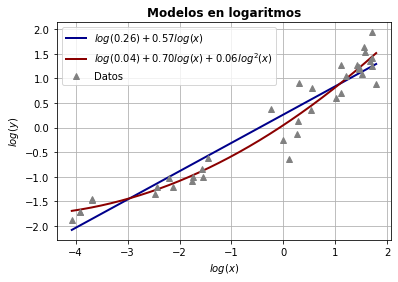

--
EC
--
Modelo 1 (azul): 4.3200
Modelo 2 (rojo): 2.9219
--
ECM
--
Modelo 1 (azul): 0.1168
Modelo 2 (rojo): 0.0790
--
---------------------------------------------------------------------------
El menor ECM es del Modelo 2 (log) : log(y)= log(b) + alog(x) + c(log(x))^2
---------------------------------------------------------------------------


In [22]:
# Comparación de modelos
# Logaritmos
plt.plot(x_eval_log_m1, y_eval_log_m1, '-',color='darkblue', linewidth=2.0)
plt.plot(x_eval_log_m2, y_eval_log_m2, '-',color='darkred', linewidth=2.0)
plt.plot(x_log, log_y,'^', color='grey')

plt.legend(('$log(0.26)+0.57log(x)$', '$log(0.04) + 0.70log(x) + 0.06log^{2}(x)$', 'Datos'), loc='best')
plt.xlabel('$log(x)$'); plt.ylabel('$log(y)$')
plt.title('Modelos en logaritmos', fontweight='bold')
plt.grid(True)
plt.show()

ecm_mods_log = [ecm_m1_log, ecm_m2_log]
best_mod_log = np.argmin(ecm_mods_log)
ecm_names_log = ['Modelo 1 (log)', 'Modelo 2 (log)']
ecm_mod_form_log = ['log(y)= log(b) + alog(x)', 'log(y)= log(b) + alog(x) + c(log(x))^2']

ec_st = str('EC')
print('-'*len(ec_st)); print(ec_st), print('-'*len(ec_st))
print(f"Modelo 1 (azul): {'{0:.4f}'.format(ec_m1_log)}")  
print(f"Modelo 2 (rojo): {'{0:.4f}'.format(ec_m2_log)}") 
print('-'*len(ec_st)); print('ECM'), print('-'*len(ec_st))
print(f"Modelo 1 (azul): {'{0:.4f}'.format(ecm_m1_log)}")  
print(f"Modelo 2 (rojo): {'{0:.4f}'.format(ecm_m2_log)}") 
print('-'*len(ec_st));

mod_ast = str(f"El menor ECM es del {ecm_names_log[best_mod_log]} : {ecm_mod_form_log[best_mod_log]}")
print('-'*len(mod_ast)); print(mod_ast); print('-'*len(mod_ast))

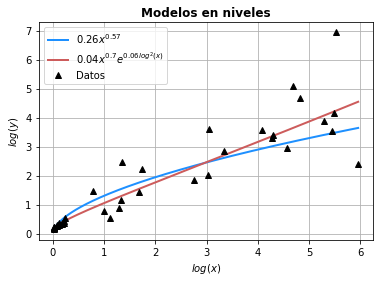

--
EC
--
Modelo 1 (azul): 25.3018
Modelo 2 (rojo): 20.3041
--
ECM
--
Modelo 1 (azul): 0.6838
Modelo 2 (rojo): 0.5488
--
-----------------------------------------------------
El menor ECM es del Modelo 2 : bx^(a)exp(clog^(2)(x))
-----------------------------------------------------


In [23]:
# Comparación de modelos
# Niveles
plt.plot(x_eval_m1, y_eval_m1, '-',color='dodgerblue', linewidth=2.0)
plt.plot(x_eval_m2, y_eval_m2, '-',color='indianred', linewidth=2.0)
plt.plot(x, y,'^', color='black')

plt.legend(('$0.26x^{0.57}$', '$0.04x^{0.7}e^{0.06log^{2}(x)}$', 'Datos'), loc='best')
plt.xlabel('$log(x)$'); plt.ylabel('$log(y)$')
plt.title('Modelos en niveles', fontweight='bold')
plt.grid(True)
plt.show()

ecm_mods = [ecm_m1, ecm_m2]
best_mod = np.argmin(ecm_mods)
ecm_names = ['Modelo 1', 'Modelo 2']
ecm_mod_form = ['bx^{a}', 'bx^(a)exp(clog^(2)(x))']

ec_st = str('EC')
print('-'*len(ec_st)); print(ec_st), print('-'*len(ec_st))
print(f"Modelo 1 (azul): {'{0:.4f}'.format(ec_m1)}")  
print(f"Modelo 2 (rojo): {'{0:.4f}'.format(ec_m2)}") 
print('-'*len(ec_st)); print('ECM'), print('-'*len(ec_st))
print(f"Modelo 1 (azul): {'{0:.4f}'.format(ecm_m1)}")  
print(f"Modelo 2 (rojo): {'{0:.4f}'.format(ecm_m2)}") 
print('-'*len(ec_st));

mod_ast = str(f"El menor ECM es del {ecm_names[best_mod]} : {ecm_mod_form[best_mod]}")
print('-'*len(mod_ast)); print(mod_ast); print('-'*len(mod_ast))